# Minicurso Python Para Data Science

- Jonas P. Oliveira
- Dayvison Gomes de Oliveira


## Ligações para o 911

Para este minicurso estaremos analisando alguns dados de chamadas para o 911 do [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Os dados contém os seguintes campos:

* lat: Variável String, Latitude
* lng: Variável String, Longitude
* desc: Variável String, Descrição da Chamada de Emergência
* zip: Variável String, CEP
* título: Variável String, Título
* timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
* twp: Variável String, Township
* addr: Variável String, Endereço
* e: Variável String, variável Dummy (sempre 1)

A seguir temos as documentações das bibliotecas que serão usadas:

- [Numpy](https://numpy.org/doc/stable/)
- [Pandas](https://pandas.pydata.org/docs/reference/index.html)
- [Matplotlib](https://matplotlib.org/stable/contents.html)
- [Seaborn](https://seaborn.pydata.org/api.html)
- [Sklearn](https://scikit-learn.org/stable/modules/classes.html)
- [TensorFlow](https://www.tensorflow.org/api_docs/python/tf?hl=pt-br)


## Dados e Configuração

**Importar numpy e pandas**

In [2]:
import numpy as np
import pandas as pd

**Importe as bibliotecas de visualização e configure% matplotlib inline.**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

**Leia o arquivo csv como um dataframe chamado df**

In [40]:
df = pd.read_csv('DS/911.csv')

**Verifique a info() do df**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Verifique o cabeçalho do df**

In [10]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Perguntas básicas

**Quais são os top 5 CEPs nas chamadas 911?**

In [17]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**Quais são os 5 principais municípios nas chamadas 911?**

In [18]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Dê uma olhada na coluna 'title'. Quantos códigos de título exclusivos existem?**

In [23]:
df['title'].nunique()

110

## Criando novos recursos

**Na coluna "title" existem "Razões / Departamentos" especificados antes do código do título. Estes são "EMS", "Fire" e "Traffic". Use .apply () com uma expressão lambda personalizada para criar uma nova coluna chamada "Razão" que contém esse valor de string.**

**Por exemplo, se o valor da coluna do título for EMS: BACK PAINS / BLESSOR, o valor da coluna Reason seria EMS.**

In [28]:
"EMS: BACK PAINS / BLESSOR".split(':')[0]

'EMS'

In [41]:
df['Reason'] = df['title'].apply( lambda title: title.split(':')[0] )

**Qual é o motivo mais comum para uma chamada do 911 com base nessa nova coluna?**

In [32]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**Agora use Seaborn para criar um countplot de chamadas 911 baseadas nesta nova coluna.**

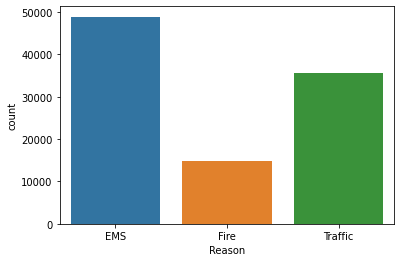

In [42]:
sns.countplot( x='Reason' , data=df )

**Agora vamos começar a focar em informações de tempo. Qual é o tipo de dados dos objetos na coluna timeStamp?**

In [45]:
type(df['timeStamp'].iloc[0])

str

**Você deveria ter notado que esses timestamps ainda são strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) para converter a coluna de strings em objetos DateTime.**

In [47]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [52]:
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

**Agora você pode pegar atributos específicos de um objeto Datetime chamando-os. Por exemplo:**

    time = df['timeStamp'].iloc[0]
    time.hour

**Você pode usar o método de consulta de funções do Jupyter (Tab) para explorar os vários atributos que você pode chamar. Agora que a coluna timestamp é realmente objetos DateTime, use .apply () para criar 3 novas colunas chamadas Hour, Month e Day of Week. Você criará essas colunas com base na coluna timeStamp, consulte as soluções se você ficar preso nesta etapa.**

In [53]:
df['Hour'] = df['timeStamp'].apply( lambda time: time.hour  )
df['Month'] = df['timeStamp'].apply( lambda time: time.month )
df['Day of Week'] = df['timeStamp'].apply( lambda time: time.dayofweek)

In [54]:
df['Day of Week']

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: Day of Week, Length: 99492, dtype: int64

**Observe como o dia da demana é um número inteiro de 0-6. Use o .map () com este dicionário para mapear os nomes das seqüências reais para o dia da semana:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [55]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [56]:
df['Day of Week'] = df['Day of Week'].map(dmap)

df['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

**Agora use Seaborn para criar um countplot da coluna "Day of Week" com a tonalidade baseada na coluna Reason.**

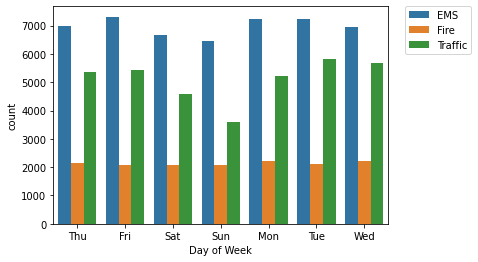

In [58]:
sns.countplot( x='Day of Week' , data=df , hue='Reason' )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Agora faça o mesmo para o mês:**

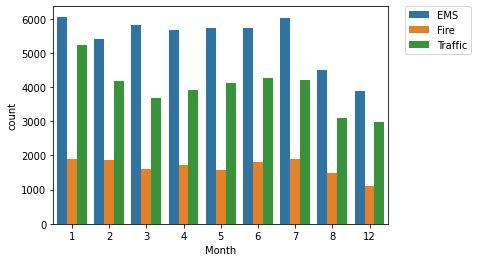

In [59]:
sns.countplot( x='Month' , data=df , hue='Reason' )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Você notou algo estranho no Plot?**

_____

**Você deve ter notado que estavam faltando alguns meses. Vejamos se podemos talvez preencher essa informação ao traçar as informações de outra forma, possivelmente um plot de linha simples que preencha os meses que faltam. Para fazer isso, precisamos trabalhar com pandas...**

**Agora, crie um objeto groupby chamado "byMonth", onde você agrupa o DataFrame pela coluna do mês e use o método count() para agregação. Use o método head() neste DataFrame retornado.**

In [61]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Agora crie um plot simples fora do Dataframe indicando a contagem de chamadas por mês.**

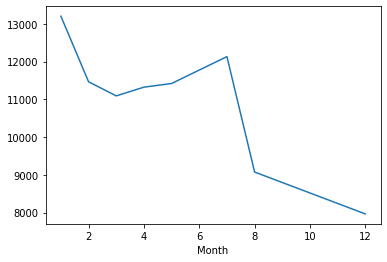

In [62]:
byMonth['twp'].plot()

**Agora veja se você pode usar o lmplot () do Seaborn para criar um modelo linear no número de chamadas por mês. Tenha em mente que talvez seja necessário resetar o índice em uma coluna.**

In [64]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


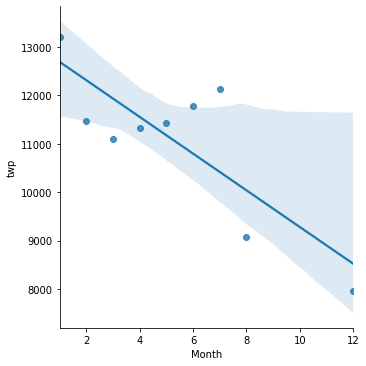

In [65]:
sns.lmplot( x='Month' , y='twp' , data=byMonth.reset_index()  )

**Crie uma nova coluna chamada 'Data' que contenha a data da coluna timeStamp. Você precisará usar .apply() junto com o método .date().**

In [66]:
df['Date'] = df['timeStamp'].apply( lambda time: time.date())

In [67]:
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

**Agora agrupe esta coluna Data com o groupby. Usando o count (), crie um gráfico de contagens de chamadas 911.**

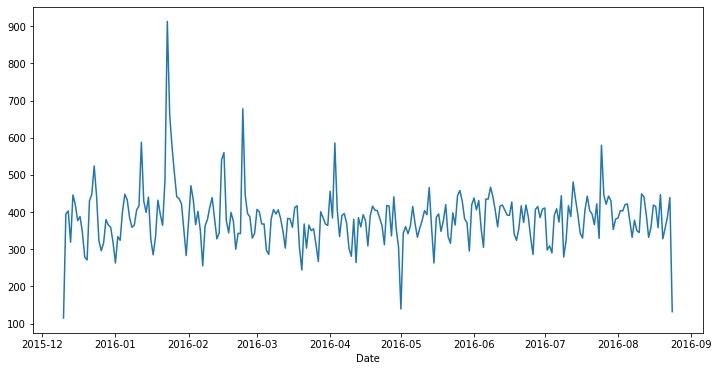

In [69]:
plt.figure(figsize=(12,6))
df.groupby('Date').count()['twp'].plot()

**Agora recrie esse plot, mas crie 3 plots separados com cada plot representando uma Razão para a chamada 911**

In [71]:
df['Reason'] == 'Traffic'

0        False
1        False
2        False
3        False
4        False
         ...  
99487     True
99488     True
99489    False
99490    False
99491     True
Name: Reason, Length: 99492, dtype: bool

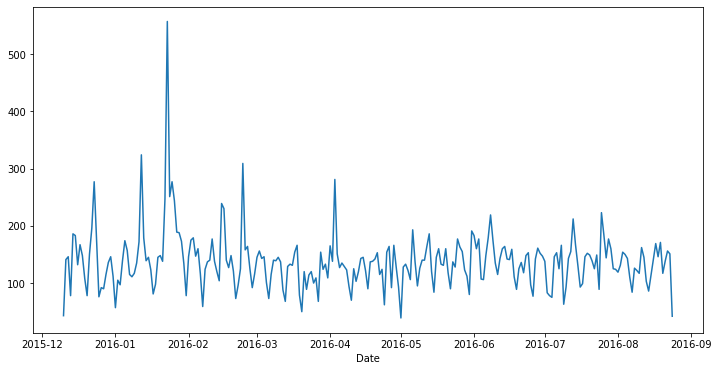

In [74]:
plt.figure(figsize=(12,6) )
df[ df['Reason'] == 'Traffic' ].groupby('Date').count()['twp'].plot()

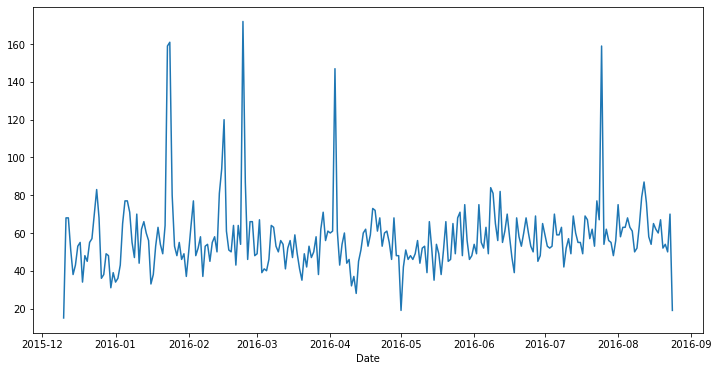

In [75]:
plt.figure(figsize=(12,6) )
df[ df['Reason'] == 'Fire' ].groupby('Date').count()['twp'].plot()

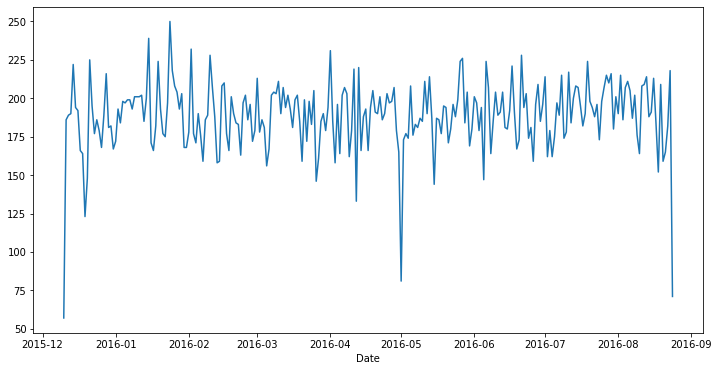

In [76]:
plt.figure(figsize=(12,6) )
df[ df['Reason'] == 'EMS' ].groupby('Date').count()['twp'].plot()

____
**Agora vamos continuar a criar mapas de calor com seaborn e nossos dados. Em primeiro lugar, devemos reestruturar o quadro de dados para que as colunas se tornem horas e o Índice se torne o Dia da Semana. Há muitas maneiras de fazer isso, mas eu recomendaria tentar combinar groupby com o método [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) . Consulte as soluções se você ficar preso nisso!**

In [78]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

In [79]:
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,803,859,885,890,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,793,822,893,842,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,697,769,801,831,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,643,693,771,679,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,837,773,889,936,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,840,838,887,917,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,800,789,903,872,904,867,990,1037,894,686,668,575,490,335


**Agora crie um mapa de calor usando este DataFrame**

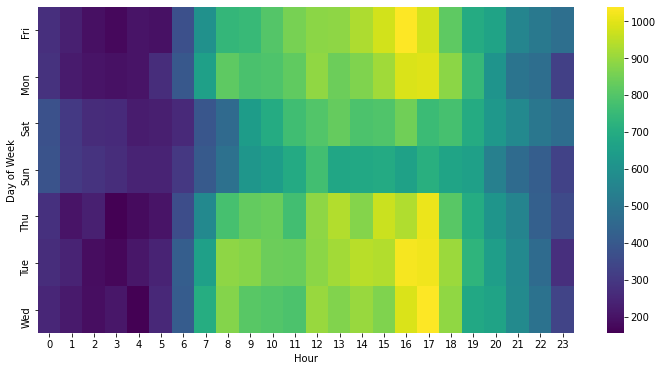

In [81]:
plt.figure(figsize=(12,6))
sns.heatmap( dayHour, cmap='viridis' )

**Agora repita estes mesmo plot e operações para um DataFrame que mostra o mês como a coluna.**

In [82]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()

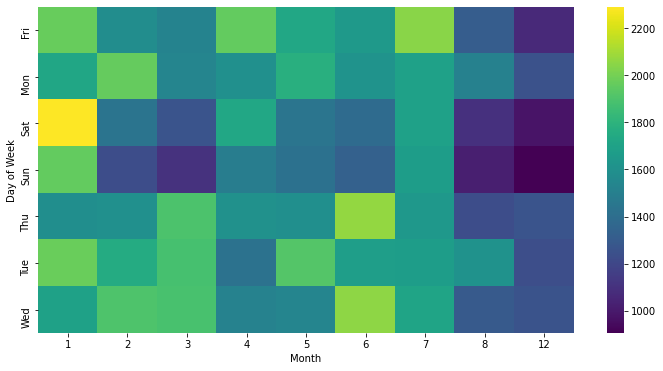

In [84]:
plt.figure(figsize=(12,6))

sns.heatmap( dayMonth, cmap='viridis' )

# BÔNUS

## Regressão 

### Regressão Linear

In [85]:
from sklearn.linear_model import LinearRegression

df = pd.read_csv('DS/medidas.csv')

df

,Altura,Peso
0,187,109.72
1,177,91.09
2,180,88.93
3,177,89.39
4,177,92.02
...,...,...
95,166,57.14
96,165,71.16
97,159,68.75
98,159,58.22


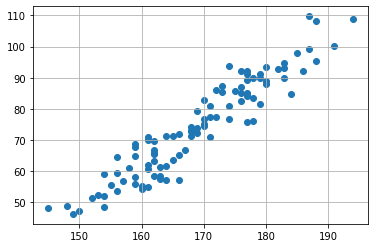

In [88]:
X = df[['Altura']].values
y = df[['Peso']].values

plt.grid()
plt.scatter(X,y)

In [89]:
model = LinearRegression()

model.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
a = model.coef_[0][0]

In [95]:
b = model.intercept_[0]

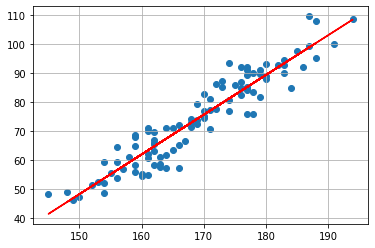

In [98]:
plt.plot(X, a*X + b, color='red')
plt.grid()
plt.scatter(X,y)

## Classificação

### Classificação Binária

In [99]:
df = pd.read_csv('DS/diabetes.csv')

In [100]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [101]:
from sklearn.model_selection import train_test_split

X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age']].values
y = df[['Outcome']].values

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3)

In [111]:
import tensorflow as tf


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_dim=8, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
]
)

model.compile( loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'] )



In [112]:
model.fit( x=X_train, y=Y_train,  epochs=50  )

Epoch 1/50
17/17 [==============================] - 1s 2ms/step - loss: 14.6491 - accuracy: 0.6685
Epoch 2/50
17/17 [==============================] - 0s 2ms/step - loss: 7.9865 - accuracy: 0.6034
Epoch 3/50
17/17 [==============================] - 0s 2ms/step - loss: 4.6829 - accuracy: 0.5233
Epoch 4/50
17/17 [==============================] - 0s 2ms/step - loss: 2.6529 - accuracy: 0.4916
Epoch 5/50
17/17 [==============================] - 0s 2ms/step - loss: 1.6061 - accuracy: 0.5065
Epoch 6/50
17/17 [==============================] - 0s 2ms/step - loss: 1.2187 - accuracy: 0.4991
Epoch 7/50
17/17 [==============================] - 0s 2ms/step - loss: 0.9910 - accuracy: 0.5736
Epoch 8/50
17/17 [==============================] - 0s 2ms/step - loss: 0.9172 - accuracy: 0.5922
Epoch 9/50
17/17 [==============================] - 0s 2ms/step - loss: 0.8593 - accuracy: 0.5978
Epoch 10/50
17/17 [==============================] - 0s 2ms/step - loss: 0.8196 - accuracy: 0.6071
Epoch 11/50
17/17 

In [113]:
y_pred = model.predict(X_test)



In [115]:
for i in range(len(y_pred)):
  if y_pred[i,0] >= 0.5:
    y_pred[i,0] = 1
  
  else:
    y_pred[i,0] = 0

In [118]:
from sklearn.metrics import classification_report

In [119]:
print(classification_report( Y_test, y_pred  ))

              precision    recall  f1-score   support

           0       0.64      0.74      0.68       141
           1       0.46      0.34      0.39        90

    accuracy                           0.58       231
   macro avg       0.55      0.54      0.54       231
weighted avg       0.57      0.58      0.57       231

